# Yelp Data Challenge - NLP

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/last_2_years_restaurant_reviews.csv')

In [3]:
df.head(2)

,business_id,name,categories,bus_stars,funny,user_id,review_id,text,stars,date,useful,type,cool
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,0XVzm4kVIAaH4eQAxWbhvw,nCqdz-NW64KazpxqnDr0sQ,I mainly went for the ceasar salad prepared ta...,1,2015-06-26,0,review,0
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2aeNFntqY2QDZLADNo8iQQ,iwx6s6yQxc7yjS7NFANZig,Nice atmosphere and wonderful service. I had t...,4,2015-06-29,0,review,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347619 entries, 0 to 347618
Data columns (total 13 columns):
business_id    347619 non-null object
name           347619 non-null object
categories     347619 non-null object
bus_stars      347619 non-null float64
funny          347619 non-null int64
user_id        347619 non-null object
review_id      347619 non-null object
text           347619 non-null object
stars          347619 non-null int64
date           347619 non-null object
useful         347619 non-null int64
type           347619 non-null object
cool           347619 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 34.5+ MB


### Define your feature variables, here is the text of the review

In [5]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df.text.values

In [6]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
print(documents[0:2])

[ 'I mainly went for the ceasar salad prepared tableside.  I ate in the bar, the bartender was very nice and helpful.  I got the grilled cheese with tomato soup.  Grilled cheese was very good but the soup was nothing special.  Now the salad that i read one reviewer said the best in vegas, which is the only reason i came.  Knowing that they put anchovies in it when they prepare tableside, i was going to tell them to hold off on that once they get started.  So as im waiting for them to come up and make it, they bring it already prepared.  What is that?  The whole point of getting it is to watch it being done and see that its made fresh.  So obviously the anchovies were already in it, and since i explained i didnt want them, they made another.   I was told its a fire hazard to prepare it in the bar area so they made it on the side when i wasnt looking.  The few bites i took werent that good.  So i watch them make the 2nd salad in the hallway.  Needless to say, it was totally flavorless, i

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [7]:
# Make a column and take the values, save to a variable named "target"
target = df.stars.astype("category", ordered = True)
# target = (df.stars > 4).values

In [8]:
target.value_counts()

5    160171
4     76708
1     42261
3     39212
2     29267
Name: stars, dtype: int64

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

<Container object of 5 artists>

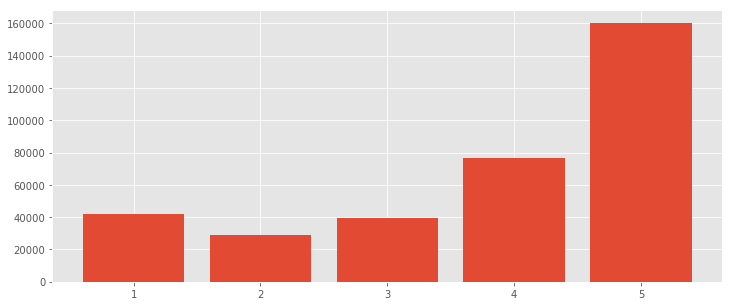

In [10]:
# To be implemented
fig, axes = plt.subplots(1, 1, figsize = (12,5))
axes.bar(target.value_counts().index, target.value_counts().values)

In [11]:
# let's make a binary target
target = (target > 4).values 

In [40]:
target = target * [1]

#### You may want to look at the statistic of the target variable

## Let's create training dataset and test dataset

In [13]:
from sklearn.model_selection import train_test_split

In [41]:
# Documents is your X, target is your y
# Now split the data to training set and test set
# Split to documents_train, documents_test, target_train, target_test
import numpy as np
documents_train, documents_test, target_train, target_test = train_test_split(documents, target,
                                                                              test_size = 0.3, random_state = 1)

## Let's get NLP representation of the documents

In [15]:
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'[a-z,A-Z]+')
# def lem(doc):
#     wordnet = WordNetLemmatizer()
#     return [wordnet.lemmatize(word) for word in tokenizer.tokenize(doc)]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(strip_accents = 'unicode', lowercase = True, 
                             stop_words = "english", token_pattern = u'[a-z,A-Z]+[a-z,A-Z]+', max_features = 500)

In [18]:
# Train the model with your training data
doc_train_matrix = vectorizer.fit_transform(documents_train).toarray()

In [19]:
# Get the vocab of your tfidf
vocabulary = vectorizer.get_feature_names()

In [20]:
# Use the trained model to transform your test data
doc_test_matrix = vectorizer.transform(documents_test).toarray()

In [21]:
doc_train_matrix.shape

(243333L, 500L)

## Similar review search engine

In [22]:
import numpy as np

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest nth values.
    # Return the labels for each of these indices.
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  
    

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]

In [23]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
# Draw an arbitrary review from test (unseen in training) documents
np.random.seed(1)
index = np.random.randint(0,doc_test_matrix.shape[0])
query = doc_test_matrix[index]

In [25]:
# Transform the drawn review(s) to vector(s)
# it's already been in tfidf form

In [26]:
# Calculate the similarity score(s) between vector(s) and training vectors
score = cosine_similarity(query.reshape(1,-1), doc_train_matrix)

In [27]:
score

array([[ 0.        ,  0.06161559,  0.01812805, ...,  0.01746198,
         0.01807806,  0.06732494]])

In [28]:
# Let's find top 5 similar reviews
n = 5
sim_review = get_top_values(score[0], n, documents_train)

In [29]:
print('Our search query:')
print(documents_test[index])

Our search query:
I like the cocktails, but the food is really overpriced for what it is- the only time I would go is for their happy hour, and even then it's not cheap. I had the mussels appetizer and a flatbread, other people in my party had the steaks. Both were totally fine, just not worth the high prices.

If you want a romantic spot for a fancy cocktail, this is a nice option- I won't be eating food there again though.


In [30]:
print('Most %s similar reviews:' % n)
for review in sim_review:
    print(review)
    print("************")

Most 5 similar reviews:
I've seen a lot of advertisements for this place for a long time and finally decided to try it with a 20% off voucher. The ambience was nice and the food offered a great value. If you have a party of 4 or 5 you can easily feed them a appetizer and entree for under $70 total. With that being said if you're less than a party of that size you won't find much value in eating here. The prices are about $20 for ANY appetizer and $25-32 for any entree. Of course, they are meant to be shared but smaller parties are stuck taking food home. 

We ordered baked ziti which was $28 and over priced for the flavor and execution of the dish. Tasted more like Mac and Cheese with a hint of tomatoes. 

We weren't impressed overall with the food or prices and will stick with Maggianos or Battistas Hole in the Wall.
************
Amazing Bloody Mary! Hard to find but worth it! Not exactly cheap but totally worth what you get. Phenomenal good!!!
************
This place was totally awes

### the search results are similar to what we search in terms of price, they are not cheap but worth it

## Classifying positive/negative review

#### Naive-Bayes Classifier

In [31]:
# Build a Naive-Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()

In [42]:
# Get score for training set
NB.fit(doc_train_matrix, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
# Get score for test set
NB.score(doc_train_matrix, target_train)

0.78125860446384177

In [44]:
NB.score(doc_test_matrix, target_test)

0.78066087490171254

#### Logistic Regression Classifier

In [45]:
# Build a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

In [46]:
# lgr = LogisticRegression(solver = 'sag', multi_class = 'multinomial', random_state = 1)
lgr = LogisticRegression(solver = 'sag')

In [47]:
# Get score for training set
lgr.fit(doc_train_matrix, target_train)
lgr.score(doc_train_matrix, target_train)

0.80068876806680556

In [48]:
# Get score for test set
lgr.score(doc_test_matrix, target_test)

0.79842931937172779

#### Q: What are the key features(words) that make the positive prediction?

In [50]:
# Let's find it out by ranking
n = 20
# print("I made multi-classify that is", lgr.classes_)
# print("we want to find ", n, " most useful words for each category")
# cof1, cof2, cof3, cof4, cof5 = np.argsort(lgr.coef_)[:,-n:]
# for i in range(1,6):
#     print("for class/star ",i,",the first ", n, "most useful words are: ")
#     print()
get_top_values(lgr.coef_[0],n,vocabulary)

[u'amazing',
 u'best',
 u'thank',
 u'awesome',
 u'perfect',
 u'delicious',
 u'fantastic',
 u'highly',
 u'favorite',
 u'greeted',
 u'excellent',
 u'wow',
 u'great',
 u'wonderful',
 u'love',
 u'perfectly',
 u'mouth',
 u'thanks',
 u'owner',
 u'glad']

#### Q: What are the key features(words) that make the negative prediction?

In [51]:
# Let's find it out by ranking
# n = 20
get_bottom_values(lgr.coef_[0],n,vocabulary)

[u'worst',
 u'horrible',
 u'bland',
 u'terrible',
 u'rude',
 u'ok',
 u'slow',
 u'okay',
 u'dry',
 u'average',
 u'however,',
 u'decent',
 u'guess',
 u'reason',
 u'wasn',
 u'wouldn',
 u'salty',
 u'maybe',
 u'bad',
 u'overall,']

there may be somehow overfitting

#### Random Forest Classifier

In [54]:
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() # at first, let's use default set

In [55]:
# Get score for training set
rf.fit(X = doc_train_matrix, y = target_train)
rf.score(X = doc_train_matrix, y = target_train)

0.98806162748168147

In [56]:
# Get score for test set
rf.score(doc_test_matrix, target_test)

0.75895134533877995

#### Q: What do you see from the training score and the test score?

there may be somehow overfitting, too.

#### Q: Can you tell what features (words) are important by inspecting the RFC model?

In [57]:
n = 20
get_top_values(rf.feature_importances_, n, vocabulary)

[u'amazing',
 u'best',
 u'great',
 u'delicious',
 u'awesome',
 u'love',
 u'ok',
 u'good',
 u'didn',
 u'vegas',
 u'bad',
 u'place',
 u'definitely',
 u'food',
 u'pretty',
 u'excellent',
 u'service',
 u'wasn',
 u'perfect',
 u'minutes']

## Extra Credit #1: Use cross validation to evaluate your classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [58]:
# To be implemented
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf,doc_train_matrix, target_train, cv = 3)

KeyboardInterrupt: 

## Extra Credit #2: Use grid search to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [ ]:
# To be implemented
paras = {'n_estimator':(5,10,15), 'max_depth': {5,8,10}}
from sklearn.model_selection import GridSearchCV
gdsearch = GridSearchCV(estimator = rf, param_grid = paras,)
gdsearch.fit(doc_train_matrix, target_train)

In [ ]:
best_rf = gdsearch.best_estimator_
best_score = gdsearch.best_score_
best_params = gdsearch.best_params_ 

In [ ]:
best_rf.score(doc_test_matrix, target_test)